In [2]:
import pandas as pd
import numpy as np
import random

In [18]:
L = []
for i in range(10000):
    L.append(random.randint(1,6))

len(L)

10000

In [14]:
L[:6]

[2, 4, 2, 4, 6, 2]

In [19]:
# make a series 
s = (pd.Series(L).value_counts() / pd.Series(L).value_counts().sum()).sort_index()

In [16]:
s

1    0.1636
2    0.1702
3    0.1671
4    0.1658
5    0.1637
6    0.1696
Name: count, dtype: float64

<Axes: >

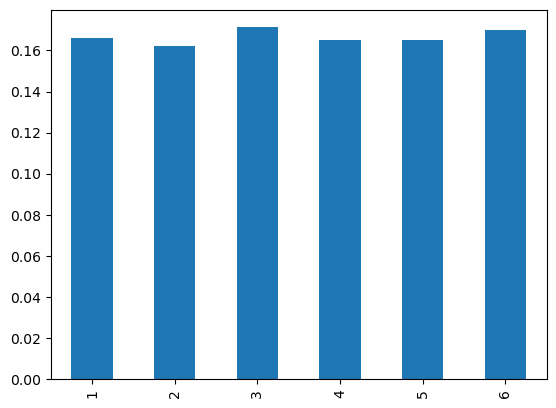

In [20]:
s.plot(kind='bar')

<Axes: >

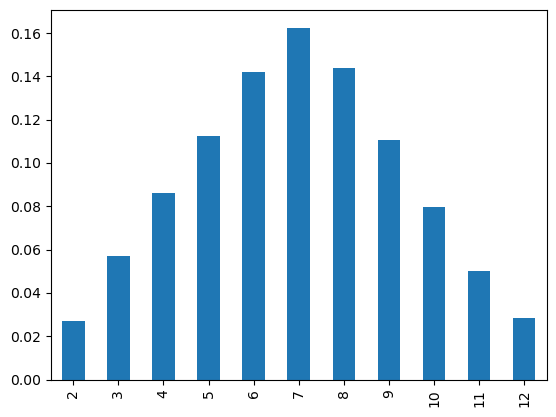

In [32]:
#  make for 2 dies
L = []
for i in range(10000):
    a = random.randint(1,6)
    b = random.randint(1,6)
    L.append(a+b)

# make a series 
s = (pd.Series(L).value_counts() / pd.Series(L).value_counts().sum()).sort_index()

# plot a graph 
s.plot(kind='bar')

In [25]:
s.info()

<class 'pandas.core.series.Series'>
Index: 11 entries, 7 to 12
Series name: count
Non-Null Count  Dtype  
--------------  -----  
11 non-null     float64
dtypes: float64(1)
memory usage: 176.0 bytes


### Code to Plot PMF & CDF

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

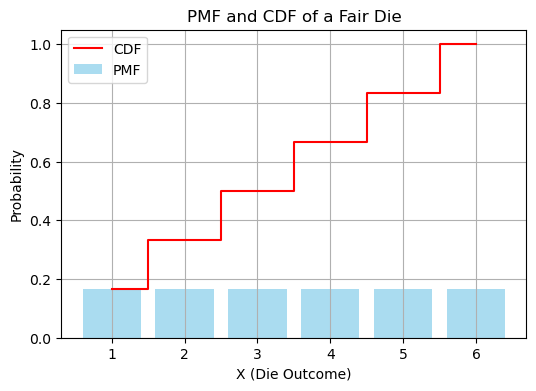

In [38]:
# Define discrete values (Die outcomes)
X = np.array([1, 2, 3, 4, 5, 6])
PMF = np.full(6, 1/6)  # Each outcome has P = 1/6
CDF = np.cumsum(PMF)   # Compute cumulative sum for CDF

# Plot PMF
plt.figure(figsize=(6,4))
plt.bar(X, PMF, color='skyblue', alpha=0.7, label='PMF')
plt.step(X, CDF, color='red', where='mid', label='CDF')
plt.xlabel("X (Die Outcome)")
plt.ylabel("Probability")
plt.legend()
plt.title("PMF and CDF of a Fair Die")
plt.grid()
plt.show()

### Parametric Density Estimation

In [40]:
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
sample = normal(loc=50, scale=5, size=100)

In [44]:
sample.mean()

49.36320306690559

(array([ 2.,  2.,  5.,  6., 18., 24., 20.,  8.,  8.,  7.]),
 array([36.83581338, 39.04366354, 41.25151371, 43.45936387, 45.66721403,
        47.87506419, 50.08291435, 52.29076451, 54.49861467, 56.70646484,
        58.914315  ]),
 <BarContainer object of 10 artists>)

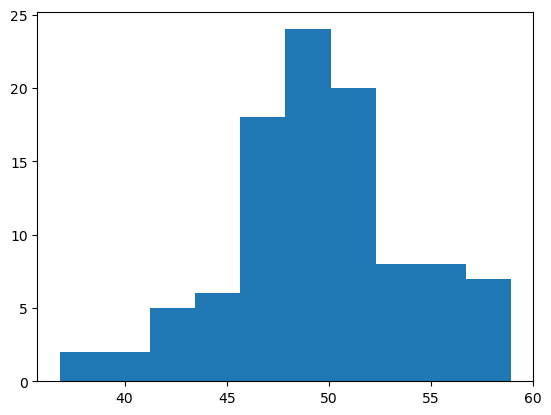

In [47]:
# plot a histrogram
plt.hist(sample, bins=10)

In [48]:
sample_mean = sample.mean()
sample_std = sample.std()

In [50]:
from scipy.stats import norm
dist = norm(sample_mean, sample_std)

In [54]:
values = np.linspace(sample.min(), sample.max(), 100)

In [55]:
sample.max()

58.91431499748365

In [57]:
proba_density = [dist.pdf(value) for value in values]

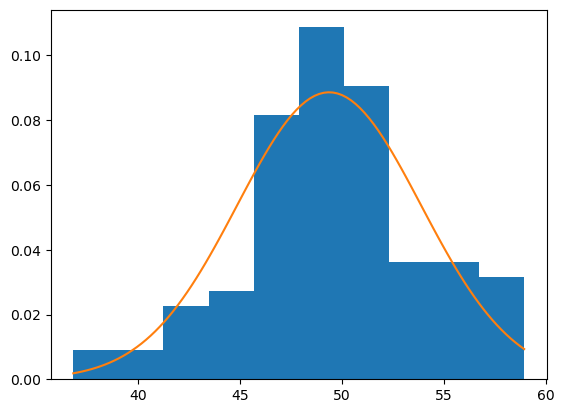

In [58]:
plt.hist(sample, bins=10, density=True)
plt.plot(values, proba_density)

/var/folders/5f/0hb_qs091gb66mrrdykchhyw0000gn/T/ipykernel_9265/1950040031.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

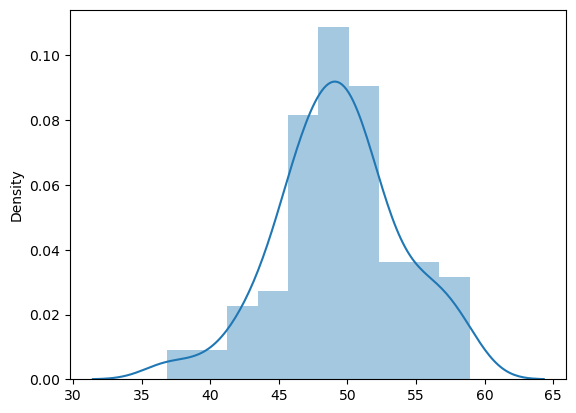

In [59]:
sns.distplot(sample)